## 1. Import the necessary libraries

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from joblib import dump,load
import import_ipynb
import numpy as np
import matplotlib.pyplot as plt
from data_process import remove_punctuation,remove_stopword
from pyvi import ViTokenizer
from sklearn.model_selection import GridSearchCV

## 2 Data preprocessing

>Read csv

In [93]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [94]:
X_train,y_train = ReadData("../data/mobile_feedback/Cleaned_Train.csv")
X_test,y_test=ReadData("../data/mobile_feedback/Cleaned_Test.csv")

In [95]:
print(X_train[0])

mới mua máy thegioididong thốt_nốt cảm_thấy ok bin trâu chụp ảnh đẹp loa nghe to bắt wf khỏe_sóng ổn_định giá_thành túi_tiền nhân_viên tư_vấn nhiệt_tình


In [96]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(7786,)
y_train size (7786,)


> word separation 

In [97]:
def wordseparation(comment):
   tokens = comment.split()
   return tokens

> Use tfidf to represent words

In [98]:
vectorizer = TfidfVectorizer(tokenizer=wordseparation)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [99]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(7786, 11621)
(2224, 11621)


In [100]:
print(X_train_tfidf[0])

  (0, 6328)	0.14214317147569203
  (0, 9570)	0.17204876985899906
  (0, 6379)	0.13505840549273368
  (0, 9554)	0.2524919271264779
  (0, 3326)	0.28879483854264304
  (0, 11543)	0.19522323496251173
  (0, 4413)	0.3674623863585831
  (0, 10339)	0.2779154247551003
  (0, 1793)	0.17131046855446375
  (0, 8990)	0.1799581578793418
  (0, 5953)	0.1546600514192805
  (0, 4783)	0.15701102747516982
  (0, 11210)	0.11244588249397608
  (0, 11492)	0.15683860798415442
  (0, 2325)	0.12067213616273807
  (0, 9125)	0.12232295765553203
  (0, 1507)	0.23028568461124438
  (0, 6961)	0.10885992217931506
  (0, 2611)	0.19070257373589075
  (0, 8823)	0.3842757381939511
  (0, 8463)	0.2955339830137982
  (0, 5510)	0.07165620114586295
  (0, 5401)	0.07729427839836116
  (0, 5848)	0.09991638311276903


In [101]:
print(X_test_tfidf[0])

  (0, 11538)	0.22740911111047848
  (0, 10883)	0.23094470941188142
  (0, 10796)	0.22312722405973848
  (0, 10758)	0.32783849893877604
  (0, 10649)	0.1948396908495428
  (0, 10601)	0.1840127064484575
  (0, 10096)	0.1382235684078876
  (0, 9345)	0.21524920136154857
  (0, 9125)	0.11580849870100747
  (0, 8529)	0.30938687972799844
  (0, 8355)	0.1290391457771224
  (0, 7306)	0.07413441411405028
  (0, 6198)	0.10761926849484642
  (0, 6064)	0.11327038694918776
  (0, 5838)	0.1664519171223931
  (0, 5745)	0.1699498458045881
  (0, 5653)	0.10368192942202155
  (0, 5464)	0.11956086067688276
  (0, 5189)	0.1999306426356204
  (0, 4756)	0.1654354600548546
  (0, 4313)	0.1293881121738093
  (0, 4281)	0.18781488157775142
  (0, 2753)	0.1770231734089879
  (0, 1984)	0.18893984282225593
  (0, 807)	0.26311469836574386
  (0, 801)	0.32783849893877604


> Visualize a sentence

In [102]:
feature_names = vectorizer.get_feature_names_out()
first_doc_tfidf = X_train_tfidf[0].tocoo()
words_tfidf = {feature_names[word]: tfidf for word, tfidf in zip(first_doc_tfidf.col, first_doc_tfidf.data)}

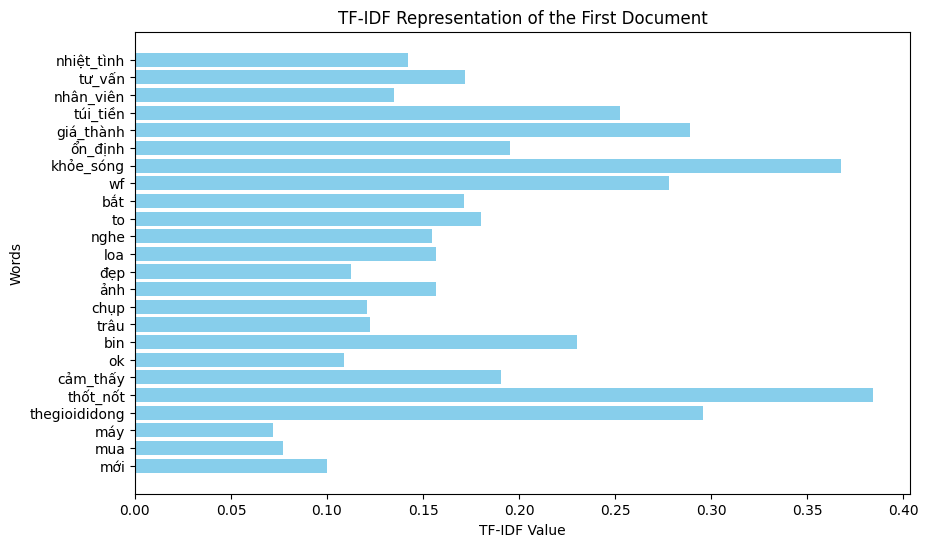

In [103]:
words = list(words_tfidf.keys())
values = list(words_tfidf.values())
plt.figure(figsize=(10, 6))
plt.barh(words, values, color='skyblue')
plt.xlabel('TF-IDF Value')
plt.ylabel('Words')
plt.title('TF-IDF Representation of the First Document')
plt.gca().invert_yaxis()
plt.show()

## 3.Built Model KNN

### 3.1 Use K-Fold Cross-validation technique to find the best set of parameters

> Randome number of neighbors from 1-100

In [104]:
import numpy as np
param_grid = {'n_neighbors': np.random.randint(1, 101, size=100)}
print(param_grid)

{'n_neighbors': array([ 53,   2,  77,  68,  40,  41,  25,  88,  86,  15,  30,  37,  96,
         1,   5,  62,   6,   6,  36,  66,  51,  21,  83,  10, 100, 100,
        53,  24,  60,  61,  29,  71,   3,  46,   8,  36,  68,  76,  19,
        98,  69,  41,  81,  15,   2,  59,  93,  16,  84,   5,  15,  14,
        88,  81,  21,  40,  28,  86,   2,  86,  37,  90,  83,  12,  71,
        53,  67,  35,  41,  30,  43,   2,  76,  20,  21,  10,  90,  43,
        40,  77,  10,  73,  48,  26,  45,  86,  87,  48,  59,   9,  69,
        17,  26,  32,  43,  86,  74,  16,   4,  47])}


> K-Fold Cross-validation

In [105]:

grid_search = GridSearchCV(KNeighborsClassifier(metric='cosine'), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 36}
Best cross-validation score: 0.7639354507326637


### 3.2 Model KNN

In [106]:
model_knn=KNeighborsClassifier(n_neighbors=36,metric='cosine')

### 3.3 Train KNN

In [107]:
model_knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=36)

> dump file knn_model_sentiment.pkl

In [108]:
dump(model_knn, '../model/knn_model_sentiment.pkl')

['../model/knn_model_sentiment.pkl']

### 3.4. Evaluating

In [109]:
model_knn_loaded=load('../model/knn_model_sentiment.pkl')

> predicting a sample

> Function Datapreprocessing

In [110]:
def Proprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= remove_stopword(comment)
    comment= [ViTokenizer.tokenize(comment)]
    comment=vectorizer.transform(comment)
    return comment

> Sample

In [111]:
comment="Máy thiết kế quá đẹp ,dùng dk mấy hôm r thấy máy vẫn ổn ,tiếc là pin tụt quá nhanh ,pin sạc thì nhanh nóng 😌"
comment=Proprocessing(comment)
print(model_knn_loaded.predict(comment))

['Positive']


> predict test dataset

In [112]:
result_predict=model_knn_loaded.predict(X_test_tfidf)

> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [114]:
accuracy=accuracy_score(y_test,result_predict)
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test,result_predict,average='weighted')
print(f"Precision: {precision:.4f}")
recall=recall_score(y_test,result_predict,average='weighted')
print(f"Recall: {recall:.4f}")
f1score=f1_score(y_test,result_predict,average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.7635
Precision: 0.7918
Recall: 0.7635
F1-score: 0.7222643198951003
